# <div align="center">WeRateDogs Twitter Account Dataset Analysis</div>

# Data Wrangling 

## Gathering Data

In [1]:
#importing important packages for the project.

import pandas as pd
import numpy as np
import requests
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

#### Setup DataFrame rendering style

In [2]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  silver solid !important;
  color: black !important;
}
</style>

In [3]:
# Read CSV (comma-separated) file into DataFrame
twitter_archive = pd.read_csv('twitter_archive_enhanced.csv')

In [4]:
# download tweet image predictions i.e., what breed of dog (or other object, animal, etc.) 
# is present in each tweet according to a neural network.

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
# check if successfully got a response
response

<Response [200]>

In [5]:
# writing the TSV file 'image-predictions.tsv' in project destination
with open(url.split('/')[-1], 'wb') as file:
        file.write(response.content)
# Read TSV file into DataFrame
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')

##  <font color='red'>NOTE TO REVIEWER:</font>
### <font color='red'>The below cell is marked as raw cell, so that it won't interrupt run all execution.<br><br>this student had mobile verification issues so the following Twitter API code was sent to this student from a Udacity instructor</font>

In [6]:
# List of dictionaries to build file by file and later convert to a DataFrame

df_list = []
my_counter = []

with open('tweet-json-copy.txt') as file:
    for line in file.readlines():
        parsed_json = (json.loads(line))
        # Append to list of dictionaries
        df_list.append({'tweet_id': parsed_json['id'],
                        'favorite_count': parsed_json['favorite_count'],
                        'retweet_count': parsed_json['retweet_count']})
        my_counter.append(parsed_json['id'])
twitter_queried = pd.DataFrame(df_list, columns = ['tweet_id', 'favorite_count', 'retweet_count'])
twitter_queried

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
...,...,...,...
2349,666049248165822465,111,41
2350,666044226329800704,311,147
2351,666033412701032449,128,47
2352,666029285002620928,132,48


## Assessing


#### Assessing table twitter_archive

In [7]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [8]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [9]:
# checking for extra characters in timestamp
twitter_archive.sample(5).timestamp


581     2016-11-20 21:00:48 +0000
1177    2016-04-12 01:51:36 +0000
2331    2015-11-16 20:32:58 +0000
111     2017-06-03 15:55:36 +0000
2201    2015-11-23 04:21:26 +0000
Name: timestamp, dtype: object

In [10]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [11]:
# checking odd rating_numerator values
twitter_archive.query('rating_numerator > 15')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None


In [12]:
# checking odd rating_denominator values
twitter_archive.query('rating_denominator%10 != 0')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1662,682962037429899265,NaN,NaN,2016-01-01 16:30:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darrel. He just robbed a 7/11 and is i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682962037...,7,11,Darrel,None,None,None,None
1663,682808988178739200,6.827884e+17,4.196984e+09,2016-01-01 06:22:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I'm aware that I could've said 20/16, but here...",NaN,NaN,NaN,NaN,20,16,None,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None


In [13]:
twitter_archive.rating_numerator.unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88], dtype=int64)

In [14]:
# sandbox cell to check urls and text visually

twitter_archive[twitter_archive.rating_numerator == 960]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [15]:
# Although this rating seems to be an error, but its a valid tweet with a sense of humour.
# no problem in time being, but it is an outlier and i might delete it if i need in analysis process.

twitter_archive[twitter_archive.rating_numerator == 1776]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None


In [16]:
#assessing data with 0 rating
twitter_archive[twitter_archive.rating_numerator == 0]
# only 2 records, one is a reply and should be deleted and the other
# has no dog in it

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None


In [17]:
# only 2 records, one is a reply and should be deleted and the other
# has no dog in it

twitter_archive[twitter_archive.rating_numerator == 0].expanded_urls.values

array(['https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1',
       'https://twitter.com/dog_rates/status/746906459439529985/photo/1'],
      dtype=object)

In [18]:
# assessing tweets id for `expanded_urls` that are equal to null
id_url_check = twitter_archive[twitter_archive.expanded_urls.isnull()].sample().tweet_id.values

In [19]:
#checking if there is a predection associated with null expanded_urls, 
try:
    image_predictions['tweet_id' == id_url_check]
except:
    print(f'No image_predictions data is found in correspoinding to tweet_id: {id_url_check}')
    

No image_predictions data is found in correspoinding to tweet_id: [738891149612572673]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  This is separate from the ipykernel package so we can avoid doing imports until


In [20]:
#only 4 source values that can be extracted and converted to categorial datatype
twitter_archive.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [21]:
# redirection link in text
twitter_archive.text.values[0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

#### Assessing table image_predictions 

In [22]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [23]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [24]:
# some images do not recognise any dog in it
# some of those images do have dogs but the model was not able to detect them
# thus I will name it as not_sure
image_predictions.query('p1_dog == False and p2_dog == False and p3_dog == False').sample().jpg_url

226    https://pbs.twimg.com/media/CU2akCQWsAIbaOV.jpg
Name: jpg_url, dtype: object

In [25]:
image_predictions.query('p1_dog == False and p2_dog == False and p3_dog == False').sample()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
311,671544874165002241,https://pbs.twimg.com/media/CVHOgDvU4AAfrXD.jpg,1,feather_boa,0.240858,False,wig,0.085946,False,wool,0.040674,False


#### Assessing table twitter_queried

In [26]:
twitter_queried

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
...,...,...,...
2349,666049248165822465,111,41
2350,666044226329800704,311,147
2351,666033412701032449,128,47
2352,666029285002620928,132,48


In [27]:
twitter_queried.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [28]:
twitter_queried.describe()

,tweet_id,favorite_count,retweet_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


### Quality

##### `twitter_archive` table
1. wrong values in `rating_numerator` and `rating_numerator`columns .
    1. tweet_id `810984652412424192` has no rating but contains 24/7 in text which means the whole week.
    - tweet_id `775096608509886464` wrong rating, its rating value is 14/10 -visually inspected text and urls- .
    - tweet_id `682962037429899265` wrong rating, its rating value is 10/10 -visually inspected text and urls- .
    - tweet_id `666287406224695296` wrong rating, its rating value is 9/10 -visually inspected text and urls- .
    - tweet_id `786709082849828864` wrong rating of 9.75/10 as a joke on harry potter, it is 13/10 instead.
    - tweet_id `670842764863651840` a man named dogg with 420/10 and not a dog.
    - tweet_id `778027034220126208` wrong rating by 27/10 but it is actually 11.27/10
    - some tweets have aggregated ratings for multible dogs .
    - tweet_id `749981277374128128` has a rating of 1776/10, not an error but it is an outlier in analysis phase. 
    - there is no actual rating in any other tweet -except for those mentioned in previous points- <br>that has a value of
    `rating_denominator` remainder by 10 != 0.<br><br>
- tweets that are replies are not counted in this analysis
    - then no need for `in_reply_to_status_id`, `in_reply_to_user_id` columns as tidiness process.<br><br>
- tweets with no `expanded_urls` and has no data in `image_predictions` table
- there are retweeted tweets
- `name` column string 'none' not special value `NaN` 
- extra +0000 in `timestamp`
- `timestamp` is object datatype instead of timestamp datatype
- `source` column datatype is object instead of being categorial
- `source` is object instead of being categorial
- `none` string in `doggo`, `floofer`, `pupper`and `puppo` colums instead of Nan.
- dog stages has to be  categorial data type after merging them
- some tweets have more than one dog stage.<br><br>
- redirection link in `text` needs to be removed to have the plain text of the tweet.
    - If I'm to make a word-cloud i will clean it, otherwis it is not necessarily an issue.
     <font color='red'> not implemented in this notbook submission </font>


### Tidiness
##### `twitter_archive` table
1. retweet columns should be removed
- No need for `in_reply_to_status_id`, `in_reply_to_user_id` columns after quality issues cleaning
- two columns for rating in table `twitter_archive`, should be in one column instead
- dog staged should be in one column

##### `image_predictions` table
5. one column for the most prediction result is enough, though I will include also 1 more column of the confidence level.<br><font color='red'> not implemented in this notbook submission </font>
<br><br>
- join all tables with `tweet_id` as primary key


## Cleaning

### Before cleaning I want to give you a notice that :

    1- Tidiness issues and quality issues are built on each other and it is very hard to split them into 2 independent se-ctions.
    2- Tidiness issues and quality issues are to be interchangably addressed
    3- I tend to clean Quality issues first is seems better for this dataset.

In [29]:
# making copies for cleaning
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
twitter_queried_clean = twitter_queried.copy()

### Quality issues 

#### `twitter_archive`  : wrong values in `rating_numerator` and `rating_numerator`columns.

#### Define
removing row with tweet_id `810984652412424192`, as it has no rating but contains 24/7 in text which means the whole week.
removing row with tweet_id `670842764863651840` a man named dogg with 420/10 and not a dog

#### Code

In [30]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.tweet_id != 810984652412424192]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.tweet_id != 670842764863651840]

#### Test

In [31]:
twitter_archive_clean[twitter_archive_clean.tweet_id == 810984652412424192]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Wrong ratings
1- tweet_id `775096608509886464` wrong rating, its rating value is 14/10 . <br>
2- tweet_id `682962037429899265` wrong rating, its rating value is 10/10 . <br>
3- tweet_id `666287406224695296` wrong rating, its rating value is 9/10 .<br>
4- tweet_id `786709082849828864` wrong rating of 9.75/10 as a joke on harry potter, it is 13/10 instead.<br>
5- tweet_id `778027034220126208` wrong rating by 27/10 but it is actually 11.27/10 so I will round it to 11/10 for analysis purposes.<br>
6- tweet_id `680494726643068929` wrong rating by 26/10 but it is actually 11.26/10 so I will round it to 11/10 for analysis purposes.<br>
7- tweet_id `749981277374128128` has a rating of 1776/10, not an error but it is an outlier in analysis phase.

#### Define
Changing wrong ratings due to having numbers in the same tweet rather than the rating itself.<br>
after visually assessing tweet `text` and `expanded_urls` I got the right ratings.<br>

#### Code

In [32]:
twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] == 775096608509886464, 'rating_numerator'] = 14
twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] == 775096608509886464, 'rating_denominator'] = 10

twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] == 682962037429899265, 'rating_numerator'] = 10
twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] == 682962037429899265, 'rating_denominator'] = 10

twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] == 666287406224695296, 'rating_numerator'] = 9
twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] == 666287406224695296, 'rating_denominator'] = 10

twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] == 786709082849828864, 'rating_numerator'] = 13

twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] == 778027034220126208, 'rating_numerator'] = 11

twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] == 680494726643068929, 'rating_numerator'] = 11

# this dog had a 1776 relating to the declaration of independence of USA in July 1776 
# I will replace it with maximum rating of 14 instead
twitter_archive_clean.loc[twitter_archive_clean['tweet_id'] == 749981277374128128, 'rating_numerator'] = 14

#### Test

In [33]:
twitter_archive_clean.query('tweet_id in [775096608509886464, 682962037429899265, 666287406224695296]')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,14,10,None,None,None,None,None
1662,682962037429899265,NaN,NaN,2016-01-01 16:30:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darrel. He just robbed a 7/11 and is i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682962037...,10,10,Darrel,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,9,10,an,None,None,None,None


#### Some tweets have multible dogs with aggregated rating like 204/170.<br>

#### Define

- If `rating_denominator` value remainder by 10 is == 0 and devided by 10 is >= 2 then it is a multible dog ratings.
    - As `rating_denominator` devided by 10 is the number of dogs in the tweet's image <br><br>

- there is no actual rating in any other tweet that has a value of `rating_denominator` remainder by 10 != 0.

#### Code

In [34]:
#  aggregated ratings query
aggregated_ratings = twitter_archive_clean.query('rating_denominator % 10 == 0 and rating_denominator / 10 >= 2')

In [35]:
# getting dog_numbers array by dividing rating_denominator by 10
dog_numbers = aggregated_ratings.rating_denominator.apply(lambda x: int(x/10)).values

In [36]:
# dividing rating_numerator by dog numbers
aggregated_ratings.rating_numerator = aggregated_ratings['rating_numerator'] // dog_numbers
aggregated_ratings['rating_denominator'] = 10
aggregated_ratings.head()

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,12,10,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,11,10,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,12,10,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,2,10,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,10,10,Bluebert,None,None,None,None


In [37]:
# make a copy from twitter_archive_clean that has no aggregated ratings
twitter_archive_concat = twitter_archive_clean.copy()
twitter_archive_concat = twitter_archive_clean.query('~(rating_denominator % 10 == 0 and rating_denominator / 10 >= 2)')
twitter_archive_concat.shape

(2339, 17)

In [38]:
# merge twitter_archive_concat with edited ratings
twitter_archive_concat = pd.concat([twitter_archive_concat, aggregated_ratings], axis=0, sort=False)
twitter_archive_concat.shape

(2354, 17)

#### Test

In [39]:
twitter_archive_concat.rating_denominator.unique()

array([10,  0, 15, 11, 16], dtype=int64)

#### code

In [40]:
twitter_archive_concat = twitter_archive_concat.query('~(rating_denominator != 10 )')

#### test

In [41]:
twitter_archive_concat.rating_denominator.unique()

array([10], dtype=int64)

In [42]:
twitter_archive_concat.shape

(2350, 17)

In [43]:
# back to our twitter_archive_clean dataframe again
twitter_archive_clean = twitter_archive_concat.copy()
twitter_archive_clean.shape

(2350, 17)

In [44]:
twitter_archive_clean.rating_numerator.value_counts()

12     562
11     471
10     464
13     352
9      158
8      102
14      56
7       54
5       37
6       32
3       19
4       15
2       11
1        8
0        2
15       2
75       1
182      1
420      1
17       1
666      1
Name: rating_numerator, dtype: int64

#### Tweets that are replies are not counted in this analysis

#### Define
- removing tweet replies
   - then no need for `in_reply_to_status_id`, `in_reply_to_user_id` columns as tidiness process.
    <br>

As we need original ratings only, deleting replies is a must.

#### Code

In [45]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.in_reply_to_status_id.isnull() == True]

#### Test

In [46]:
twitter_archive_clean.in_reply_to_status_id.unique()

array([nan])

In [47]:
twitter_archive_clean.in_reply_to_user_id.unique()

array([nan])

In [48]:
twitter_archive_clean.shape

(2275, 17)

#### tweets with no `expanded_urls` and has no data in `image_predictions` table.

#### Define

Which means that those tweets have no images in it, thus making no use in analysis phase.<br>
Also there is no rating without an image of the dog rated

#### Code

In [49]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.expanded_urls.isnull() != True]

#### Test

In [50]:
twitter_archive_clean[twitter_archive_clean.expanded_urls.isnull() == True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [51]:
twitter_archive_clean.shape

(2271, 17)

#### There are retweeted tweets

#### Define

Retweeted tweets have to be removed for consistancy of original ratings only

#### Code

In [52]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull() == True]

#### Test

In [53]:
twitter_archive_clean.shape

(2091, 17)

#### `name` column string 'none' not special value `NaN`

#### Define

Every none has to be replaced by NaN
#### Code

In [54]:
twitter_archive_clean.name = twitter_archive_clean.name.replace('None', np.NaN)
twitter_archive_clean.name = twitter_archive_clean.name.replace(r'^\s*$', np.NaN, regex=True)

#### Test

In [55]:
twitter_archive_clean[twitter_archive_clean.name.isnull() == True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,NaN,None,None,None,puppo
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,NaN,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,NaN,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274,709198395643068416,NaN,NaN,2016-03-14 02:04:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/709198395...,9,10,NaN,None,None,None,None
1433,697463031882764288,NaN,NaN,2016-02-10 16:51:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Wednesday here's a bucket of pups. 44/40...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697463031...,11,10,NaN,None,None,None,None
1635,684222868335505415,NaN,NaN,2016-01-05 04:00:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Someone help the girl is being mugged. Several...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684222868...,11,10,NaN,None,None,None,None
1779,677716515794329600,NaN,NaN,2015-12-18 05:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",IT'S PUPPERGEDDON. Total of 144/120 ...I think...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677716515...,12,10,NaN,None,None,None,None


#### extra +0000 in `timestamp`
#### `timestamp` is object datatype instead of timestamp datatype

#### Define


It's the timezone offset. +0000 means UTC.<br>
hense no info is added by ir, These extra characters needs to be removed before converting `timestamp` column to time stamp format.

#### Code

In [56]:
# removing UTC characters 
twitter_archive_clean.timestamp = twitter_archive_clean.timestamp.apply(lambda x: x[:-6])

#### Test

In [57]:
twitter_archive_clean.timestamp 

0       2017-08-01 16:23:56
1       2017-08-01 00:17:27
2       2017-07-31 00:18:03
3       2017-07-30 15:58:51
4       2017-07-29 16:00:24
               ...         
1351    2016-02-28 21:25:30
1433    2016-02-10 16:51:59
1635    2016-01-05 04:00:18
1779    2015-12-18 05:06:23
1843    2015-12-13 01:41:41
Name: timestamp, Length: 2091, dtype: object

#### `timestamp` is object datatype instead of timestamp datatype

#### Define

Converting `timestamp` column to timestamp format.

#### Code

In [58]:
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'], format='%Y-%m-%d %H:%M:%S')

#### Test

In [59]:
twitter_archive_clean['timestamp']

0      2017-08-01 16:23:56
1      2017-08-01 00:17:27
2      2017-07-31 00:18:03
3      2017-07-30 15:58:51
4      2017-07-29 16:00:24
               ...        
1351   2016-02-28 21:25:30
1433   2016-02-10 16:51:59
1635   2016-01-05 04:00:18
1779   2015-12-18 05:06:23
1843   2015-12-13 01:41:41
Name: timestamp, Length: 2091, dtype: datetime64[ns]

#### `source` column datatype is object instead of being categorial

#### Define

Fisrt specify categories, then edit.

#### Code

In [60]:
twitter_archive_clean.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [61]:
# function to map each link to its platform
def source_category(source):
    """ this functions takes every source and assign in it to the proper value
    """
    if source == '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>':
        return 'Twitter for iPhone'
    elif source == '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>':
        return 'Twitter Web Client'    
    elif source == '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>':
        return 'Vine - Make a Scene'
    else:
        return 'TweetDeck'
twitter_archive_clean.source = twitter_archive_clean.source.apply(source_category)

In [62]:
twitter_archive_clean.source = twitter_archive_clean.source.astype('category')

#### Test

In [63]:
twitter_archive_clean.source.unique()

[Twitter for iPhone, Twitter Web Client, Vine - Make a Scene, TweetDeck]
Categories (4, object): [Twitter for iPhone, Twitter Web Client, Vine - Make a Scene, TweetDeck]

In [64]:
twitter_archive_clean.source.value_counts()

Twitter for iPhone     1959
Vine - Make a Scene      91
Twitter Web Client       30
TweetDeck                11
Name: source, dtype: int64

In [65]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2091 entries, 0 to 1843
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2091 non-null   int64         
 1   in_reply_to_status_id       0 non-null      float64       
 2   in_reply_to_user_id         0 non-null      float64       
 3   timestamp                   2091 non-null   datetime64[ns]
 4   source                      2091 non-null   category      
 5   text                        2091 non-null   object        
 6   retweeted_status_id         0 non-null      float64       
 7   retweeted_status_user_id    0 non-null      float64       
 8   retweeted_status_timestamp  0 non-null      object        
 9   expanded_urls               2091 non-null   object        
 10  rating_numerator            2091 non-null   int64         
 11  rating_denominator          2091 non-null   int64       

#### `none` string in `doggo`, `floofer`, `pupper`and `puppo` colums instead of Nan.


#### Define
All 'none' have to be converted to Nan before merging.

#### Code

In [66]:
for dog_stage in ['doggo', 'floofer', 'pupper', 'puppo']:
    twitter_archive_clean[dog_stage] = twitter_archive_clean[dog_stage].replace('None', '')

#### Test

In [67]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2091 entries, 0 to 1843
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2091 non-null   int64         
 1   in_reply_to_status_id       0 non-null      float64       
 2   in_reply_to_user_id         0 non-null      float64       
 3   timestamp                   2091 non-null   datetime64[ns]
 4   source                      2091 non-null   category      
 5   text                        2091 non-null   object        
 6   retweeted_status_id         0 non-null      float64       
 7   retweeted_status_user_id    0 non-null      float64       
 8   retweeted_status_timestamp  0 non-null      object        
 9   expanded_urls               2091 non-null   object        
 10  rating_numerator            2091 non-null   int64         
 11  rating_denominator          2091 non-null   int64       

### Tidiness issues 

#### Retweet columns should be removed


#### Define 

After deleting retweeted records there is no need for retweet columns.

#### Code

In [68]:
twitter_archive_clean = twitter_archive_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], 1)

#### Test

In [69]:
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,,,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,,,
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,,,
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,,,
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,,,


#### No need for `in_reply_to_status_id`, `in_reply_to_user_id` columns after quality issues cleaning

#### Define 

Removing `in_reply_to_status_id`, `in_reply_to_user_id` columns as we already deleted every value in them.

#### Code

In [70]:
twitter_archive_clean = twitter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], 1)

#### Test

In [71]:
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,,,
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,,,
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,,,
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,,,
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,,,


#### Two columns for rating in table `twitter_archive`, should be in one column instead


#### Define
As for tidiness rules, each variable forms a column.<br>
And as the `rating_denominator` is now only equal to 10 after cleaning quality issues, there is no need for it.<br>
We will keep only `rating_numerator` as column `rating`

#### Code

In [72]:
# only value for rating_denominator is 10 

twitter_archive_clean.rating_denominator.unique()

array([10], dtype=int64)

In [73]:
#deleting rating_denominator column
twitter_archive_clean = twitter_archive_clean.drop(['rating_denominator'], 1)

#renaming rating_numerator column to rating
twitter_archive_clean = twitter_archive_clean.rename(columns={"rating_numerator": "rating"})

#### Test

In [74]:
twitter_archive_clean.head(20)

,tweet_id,timestamp,source,text,expanded_urls,rating,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,,,,
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,,,,
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,Archie,,,,
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,Darla,,,,
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,Franklin,,,,
5,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,NaN,,,,
6,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,Jax,,,,
7,890729181411237888,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,NaN,,,,
8,890609185150312448,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,Zoey,,,,
9,890240255349198849,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,Cassie,doggo,,,


#### Dog staged should be in one column

#### Define

As it every dog takes only one stage in a rating, then these 4 columns of stages can be merged in one column named stage


#### Code

In [75]:
# Adding dog stages data togather in stage column
twitter_archive_clean['stage'] = twitter_archive_clean['doggo'] + twitter_archive_clean['floofer'] + twitter_archive_clean['pupper'] + twitter_archive_clean['puppo'] 

In [76]:
# deleting dog stages columns
twitter_archive_clean = twitter_archive_clean.drop(['doggo','floofer', 'pupper', 'puppo'], 1)

In [77]:
#replace empty strings with NaN
twitter_archive_clean['stage'] = twitter_archive_clean['stage'].replace(r'^\s*$', np.NaN, regex=True)

#### Test

In [78]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2091 entries, 0 to 1843
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   tweet_id       2091 non-null   int64         
 1   timestamp      2091 non-null   datetime64[ns]
 2   source         2091 non-null   category      
 3   text           2091 non-null   object        
 4   expanded_urls  2091 non-null   object        
 5   rating         2091 non-null   int64         
 6   name           1493 non-null   object        
 7   stage          335 non-null    object        
dtypes: category(1), datetime64[ns](1), int64(2), object(4)
memory usage: 132.9+ KB


In [79]:
twitter_archive_clean.stage.unique()

array([nan, 'doggo', 'puppo', 'pupper', 'floofer', 'doggopuppo',
       'doggofloofer', 'doggopupper'], dtype=object)

#### Some tweets have more than one dog stage.

#### Define

Some tweets has more than one dog in it , I will just make new merged categories and stop here.

#### Code

In [80]:
twitter_archive_clean.stage.loc[twitter_archive_clean.stage == 'doggopupper'] = 'doggo/pupper'
twitter_archive_clean.stage.loc[twitter_archive_clean.stage == 'doggofloofer'] = 'doggo/floofer'
twitter_archive_clean.stage.loc[twitter_archive_clean.stage == 'doggopuppo'] = 'doggo/puppo'

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [81]:
twitter_archive_clean.stage = twitter_archive_clean.stage.astype('category')

#### Test

In [82]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2091 entries, 0 to 1843
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   tweet_id       2091 non-null   int64         
 1   timestamp      2091 non-null   datetime64[ns]
 2   source         2091 non-null   category      
 3   text           2091 non-null   object        
 4   expanded_urls  2091 non-null   object        
 5   rating         2091 non-null   int64         
 6   name           1493 non-null   object        
 7   stage          335 non-null    category      
dtypes: category(2), datetime64[ns](1), int64(2), object(3)
memory usage: 119.0+ KB


In [83]:
twitter_archive_clean.stage.unique()

[NaN, doggo, puppo, pupper, floofer, doggo/puppo, doggo/floofer, doggo/pupper]
Categories (7, object): [doggo, puppo, pupper, floofer, doggo/puppo, doggo/floofer, doggo/pupper]

#### join all tables with `tweet_id` as primary key.

#### Define

Last point before analysis and visualisation.<br>
I have seen it better to merge 3 of the tables to a master dataset so that I can do better analysis in one place.
#### Code

In [84]:
# merging twitter_archive_clean table with twitter_queried_clean table as tabel we_rate_dogs 
we_rate_dogs = twitter_archive_clean.merge(twitter_queried_clean, left_on='tweet_id', right_on='tweet_id')

#### Test

In [85]:
we_rate_dogs

,tweet_id,timestamp,source,text,expanded_urls,rating,name,stage,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,NaN,39467,8853
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,NaN,33819,6514
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,Archie,NaN,25461,4328
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,Darla,NaN,42908,8964
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,Franklin,NaN,41048,9774
...,...,...,...,...,...,...,...,...,...,...
2086,704054845121142784,2016-02-28 21:25:30,Twitter for iPhone,Here is a whole flock of puppers. 60/50 I'll ...,https://twitter.com/dog_rates/status/704054845...,12,a,NaN,3201,1028
2087,697463031882764288,2016-02-10 16:51:59,Twitter for iPhone,Happy Wednesday here's a bucket of pups. 44/40...,https://twitter.com/dog_rates/status/697463031...,11,NaN,NaN,3748,1552
2088,684222868335505415,2016-01-05 04:00:18,Twitter for iPhone,Someone help the girl is being mugged. Several...,https://twitter.com/dog_rates/status/684222868...,11,NaN,NaN,4225,1563
2089,677716515794329600,2015-12-18 05:06:23,Twitter for iPhone,IT'S PUPPERGEDDON. Total of 144/120 ...I think...,https://twitter.com/dog_rates/status/677716515...,12,NaN,NaN,3323,1104


#### Code

In [86]:
we_rate_dogs = we_rate_dogs.merge(image_predictions_clean, left_on='tweet_id', right_on='tweet_id')

#### Test

In [87]:
we_rate_dogs

,tweet_id,timestamp,source,text,expanded_urls,rating,name,stage,favorite_count,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,NaN,39467,8853,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,NaN,33819,6514,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,Archie,NaN,25461,4328,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,Darla,NaN,42908,8964,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,Franklin,NaN,41048,9774,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1963,704054845121142784,2016-02-28 21:25:30,Twitter for iPhone,Here is a whole flock of puppers. 60/50 I'll ...,https://twitter.com/dog_rates/status/704054845...,12,a,NaN,3201,1028,...,1,Great_Pyrenees,0.667939,True,kuvasz,0.228764,True,golden_retriever,0.043885,True
1964,697463031882764288,2016-02-10 16:51:59,Twitter for iPhone,Happy Wednesday here's a bucket of pups. 44/40...,https://twitter.com/dog_rates/status/697463031...,11,NaN,NaN,3748,1552,...,1,Labrador_retriever,0.999885,True,golden_retriever,0.000098,True,pug,0.000008,True
1965,684222868335505415,2016-01-05 04:00:18,Twitter for iPhone,Someone help the girl is being mugged. Several...,https://twitter.com/dog_rates/status/684222868...,11,NaN,NaN,4225,1563,...,1,soft-coated_wheaten_terrier,0.791182,True,cocker_spaniel,0.072444,True,teddy,0.071486,False
1966,677716515794329600,2015-12-18 05:06:23,Twitter for iPhone,IT'S PUPPERGEDDON. Total of 144/120 ...I think...,https://twitter.com/dog_rates/status/677716515...,12,NaN,NaN,3323,1104,...,1,teddy,0.662908,False,crib,0.031891,False,chow,0.025438,True


In [88]:
we_rate_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1968 entries, 0 to 1967
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   tweet_id        1968 non-null   int64         
 1   timestamp       1968 non-null   datetime64[ns]
 2   source          1968 non-null   category      
 3   text            1968 non-null   object        
 4   expanded_urls   1968 non-null   object        
 5   rating          1968 non-null   int64         
 6   name            1446 non-null   object        
 7   stage           303 non-null    category      
 8   favorite_count  1968 non-null   int64         
 9   retweet_count   1968 non-null   int64         
 10  jpg_url         1968 non-null   object        
 11  img_num         1968 non-null   int64         
 12  p1              1968 non-null   object        
 13  p1_conf         1968 non-null   float64       
 14  p1_dog          1968 non-null   bool          
 15  p2  

## Stroring master dataset

In [89]:
we_rate_dogs.to_csv('twitter_archive_master.csv', index=False)

# Exploratory Data Analysis 

In [90]:
we_rate_dogs.describe()

,tweet_id,rating,favorite_count,retweet_count,img_num,p1_conf,p2_conf,p3_conf
count,1.968000e+03,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1.968000e+03,1.968000e+03
mean,7.360347e+17,10.539126,8945.185467,2780.971037,1.201220,0.594562,1.346723e-01,6.020101e-02
std,6.754238e+16,2.176618,12274.108524,4698.805472,0.557938,0.271988,1.010987e-01,5.096790e-02
min,6.660209e+17,0.000000,81.000000,16.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.758719e+17,10.000000,1984.000000,627.750000,1.000000,0.363174,5.345650e-02,1.605498e-02
50%,7.088226e+17,11.000000,4141.000000,1366.500000,1.000000,0.587635,1.174550e-01,4.945765e-02
75%,7.880674e+17,12.000000,11398.250000,3229.750000,1.000000,0.847560,1.956673e-01,9.157912e-02
max,8.924206e+17,14.000000,132810.000000,79515.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


In [91]:
we_rate_dogs.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'rating',
       'name', 'stage', 'favorite_count', 'retweet_count', 'jpg_url',
       'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3',
       'p3_conf', 'p3_dog'],
      dtype='object')

### <font color='blue'>Q1: How is rating destributed ? what is the most frequent rating and the median rating?</font>

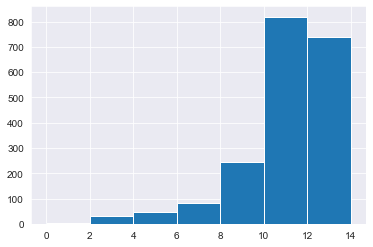

In [92]:
#bins2 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]
bins = [0,2,4,6,8,10,12,14]
we_rate_dogs.rating.hist(bins=bins);

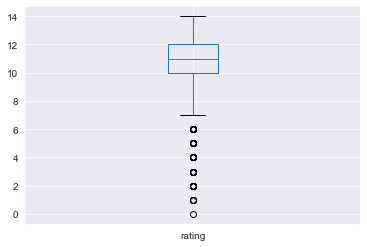

In [93]:
we_rate_dogs.rating.plot(kind ='box')

#### Insights
Rating destribution is left skewed, most of the ratings are in {10, 11, 12}.

#### Conclusions
@dog_rates account tends to give high ratings as for "they're good dogs brent".
<br><br><br>

In [94]:
# most frequent rating value

we_rate_dogs.rating.mode()[0]

12

In [95]:
we_rate_dogs.rating.median()

11.0

### <font color='blue'>Q2: Did the rating criteria change by time ?</font>

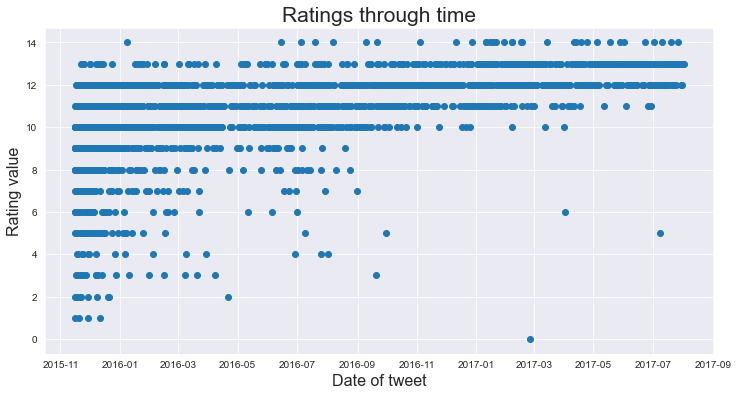

In [96]:
#we_rate_dogs.plot(x='timestamp', y="rating", kind="scatter", figsize=(12,6));
plt.subplots(figsize=(12,6))
plt.scatter(we_rate_dogs.timestamp, we_rate_dogs.rating)
plt.title('Ratings through time', fontdict={'fontsize': 21})
plt.xlabel('Date of tweet',fontdict={'fontsize': 16})
plt.ylabel('Rating value',fontdict={'fontsize': 16});

#### Insights
graph shows that @dog_rates account started w normal rating from 0 to 10 with some dogs exceeding 10.<br>
by the time they tended to give higher ratings and nearly abandoning rates below 10 by the end of 2016.

#### Conclusions
@dog_rates didn't start with their unique rating system, instead it was evolving by time.
<br><br><br>

### <font color='blue'>Q3: Is there a relation between each of ratings, favorite count and retweet count?</font>

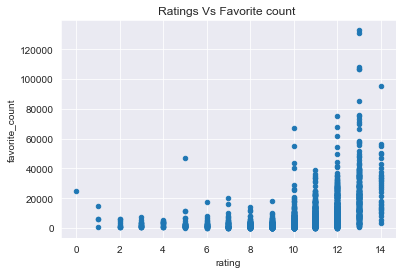

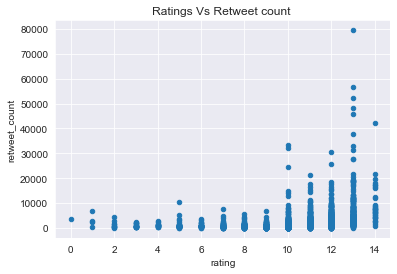

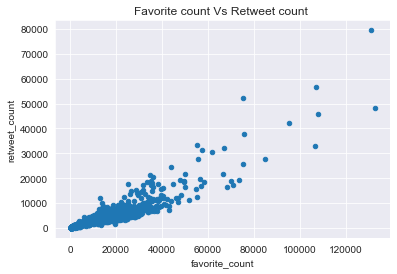

In [97]:
we_rate_dogs.plot(x='rating', y="favorite_count", kind="scatter", title = 'Ratings Vs Favorite count ');
we_rate_dogs.plot(x='rating', y="retweet_count", kind="scatter", title = 'Ratings Vs Retweet count ');
we_rate_dogs.plot(x='favorite_count', y="retweet_count", kind="scatter", title = 'Favorite count Vs Retweet count ');

#### Insights
Graphs show that as a tweet gives a dog a higher rating it get higher retweet counts and mush favored.<br>
Another interesting insight that retweets count is correlated with favorite count, and if we build a regression model trained on retweet counts it might result in a good approximation to favorite count.


#### Conclusions
People interact more with higher rating tweets.<br>
Retweets count is strongly correlated with favorite count.

<br><br><br>